# Описание проекта

Вы — аналитик крупного интернет-магазина.<br>
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.<br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 



## Описание данных

**hypothesis.csv:**

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, 
    тем дороже проверка гипотезы.


**orders.csv:**

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

**visitors.csv:**

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

# Загрузка данных

In [2]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')
hypothesis = pd.read_csv('hypothesis.csv')

# Предобработка

In [3]:
orders.info()

orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
print('\n количество дубликатов:', orders.duplicated().sum())
print(f'\n отрезок времени:{orders.date.min()} / {orders.date.max()}')

orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

 количество дубликатов: 0

 отрезок времени:2019-08-01 / 2019-08-31


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors.info()

visitors['date'] = visitors['date'].astype('datetime64[D]')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

print('\n количество пользоватей в группе А:', orders[orders['group'] == 'A']['visitorId'].count())
print('\n количество пользоватей в группе B:', orders[orders['group'] == 'B']['visitorId'].count())

print('\n количество дубликатов:', visitors.duplicated().sum())

print(f'\n отрезок времени:{visitors.date.min()} / {visitors.date.max()}')

visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

 количество пользоватей в группе А: 557

 количество пользоватей в группе B: 640

 количество дубликатов: 0

 отрезок времени:2019-08-01 / 2019-08-31


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**изменили тип данных у столбцов с датами, пропусков и дубликатов нет**


# Приоритезация гипотез

## ICE

In [6]:
hypothesis['Ice_score'] = (hypothesis['Impact'] * 
                           hypothesis['Confidence'] / 
                           hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='Ice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice_score
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00



## RICE 


In [7]:
hypothesis['Rice_score'] = (hypothesis['Reach'] * 
                            hypothesis['Impact'] * 
                            hypothesis['Confidence'] / 
                            hypothesis['Efforts']).round(2)
hypothesis.sort_values(by='Rice_score', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice_score,Rice_score
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


**приоритет RICE и ICE отличается из-за того, что в методе RICE присутствует дополнительный параметр-REACH, который предполагает ещё и оценку охвата, т.е. предполагаемой целевой аудитории проекта.**

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid orange;" />

# Анализ A/B-теста


In [8]:
orders['visitorId'].nunique()

1031

In [9]:
# пользователи попавшие в обе группы
two_group = orders.groupby(by='visitorId').agg({'group':['nunique','unique']})
two_group.columns = ['group', 'name']
two_group = two_group.query('group > 1')
print('Количество пользователей попавших в 2 группы: ',two_group['group'].count())
print('Процент от общего числа пользователей: ', two_group['group'].count() / orders['visitorId'].nunique()*100)

Количество пользователей попавших в 2 группы:  58
Процент от общего числа пользователей:  5.625606207565471


In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                    ].agg({'date' : 'max', 
                           'group' : 'max', 
                           'transactionId' : 'nunique', 
                           'visitorId' : 'nunique', 
                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                      ].agg({'date' : 'max', 
                             'group' : 'max', 
                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [11]:
cumulativeData['date'] = cumulativeData['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [12]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


## график кумулятивной выручки по группам 


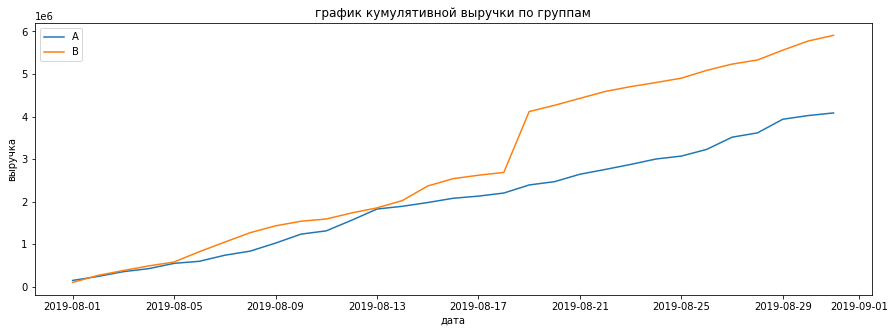

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('график кумулятивной выручки по группам')
plt.legend()
plt.show()

группа В показывает стабильно бОльшую выручку

## график кумулятивного среднего чека по группам 

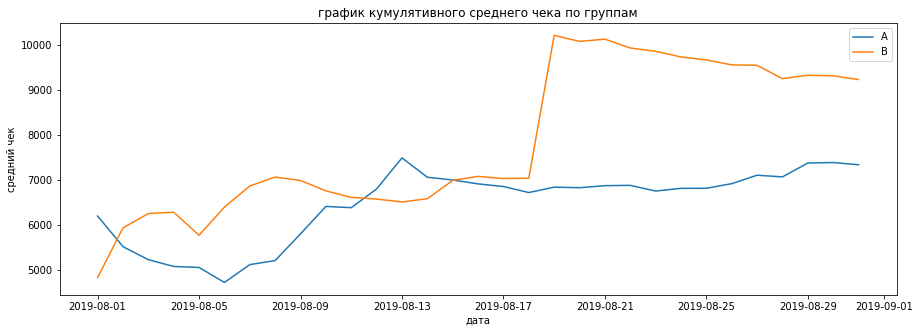

In [14]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')
plt.legend()
plt.show()

- средний чек в группе B почти всё время был выше
- резкое колебание к концу графика может означать аномальные значения

## график относительного изменения кумулятивного среднего чека группы B к группе A


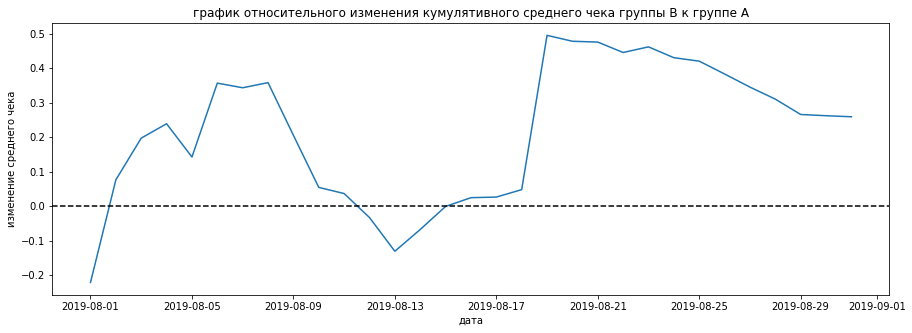

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date']
         ,(mergedCumulativeRevenue['revenueB']/
           mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/
          mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('дата')
plt.ylabel('изменение среднего чека')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

## график кумулятивной конверсии по группам

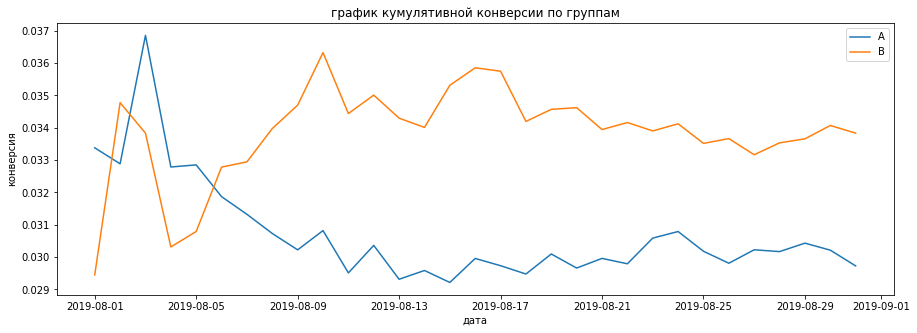

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.title('график кумулятивной конверсии по группам')
plt.show()

Группа B стабильно показывает большую конверсию чем группа A

## график относительного изменения кумулятивной конверсии группы B к группе A

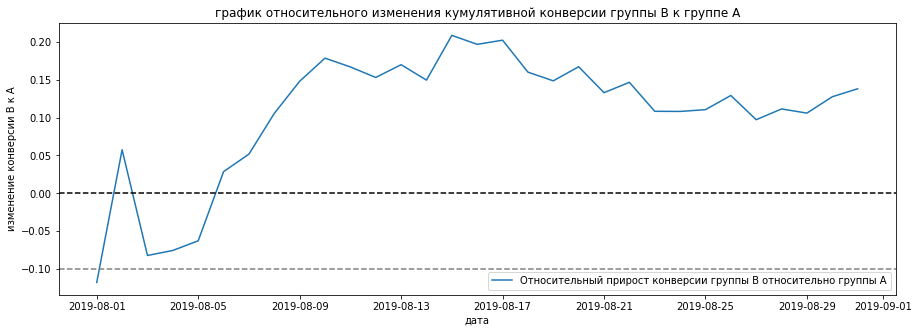

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']
                                             ].merge(cumulativeDataB[['date','conversion']
                                                                    ], left_on='date', 
                                                     right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('изменение конверсии В к А')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

## распределение количества заказов по пользователям

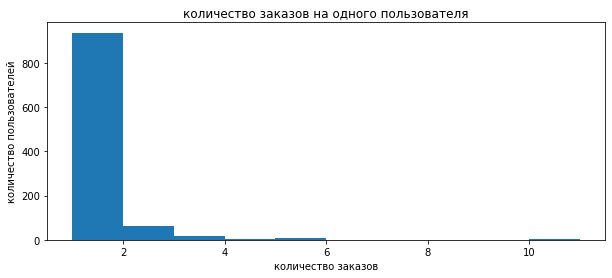

In [18]:
orders_users = orders.groupby('visitorId', as_index = False
                             ).agg({'transactionId':'nunique'}
                                  ).sort_values(by='transactionId', ascending = False
                                               )
orders_users.columns = ['visitorId', 'orders']
orders_users.head(5)
plt.figure(figsize=(10,4))
plt.hist(orders_users['orders'], bins = 10)
plt.title('количество заказов на одного пользователя')
plt.xlabel('количество заказов')
plt.ylabel('количество пользователей')
plt.show()

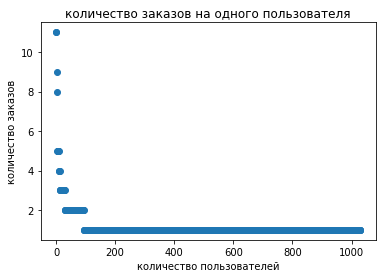

In [19]:
orders_users = orders.groupby('visitorId', as_index = False
                             ).agg({'transactionId':'nunique'}
                                  ).sort_values(by='transactionId', ascending = False
                                               )
orders_users.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(orders_users)))

plt.scatter(x_values, orders_users['orders']) 
plt.ylabel('количество заказов')
plt.xlabel('количество пользователей')
plt.title('количество заказов на одного пользователя')
plt.show()

Судя по графикам, подавляющее большинство пользователей совершает 1 заказ

## 95-й и 99-й перцентили количества заказов на пользователя

In [20]:
print(np.percentile(orders_users['orders'], [95, 99]))

[2. 4.]


не больше 5% пользователей совершают больше 2 заказов. не больше 1% совершают 4 заказа

## графики стоимости заказов

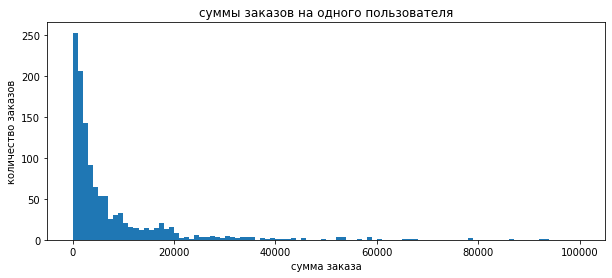

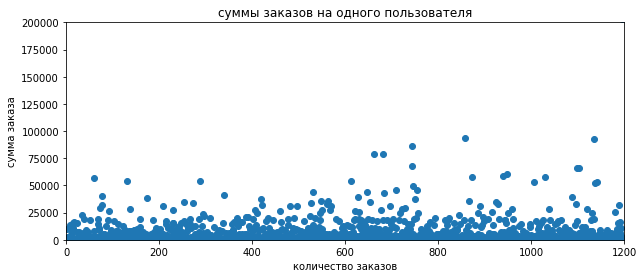

In [21]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('суммы заказов на одного пользователя')
plt.xlabel('сумма заказа')
plt.ylabel('количество заказов')
plt.show()
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('суммы заказов на одного пользователя')
plt.axis([0, 1200, 0, 200000])
plt.ylabel('сумма заказа')
plt.xlabel('количество заказов')
plt.show()

большая часть пользователей делает покупки суммой не больше 25-30 т.

## 95-й и 99-й перцентили сумм заказов на пользователя

In [22]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% заказов дороже 28

## статистическая значимость различий в конверсии между группами по «сырым» данным

- **Уровень стат. значимости возмем 0.05**
- **Для проверки будем использовать U-критерий Манна — Уитни**

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


- Н0: значения конверсии групп A и B одинаковы
- Н1: значения конверсии группы A ниже группы B

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('\n Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB, alternative='greater')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Принимаем H0')
else:
    print('\nОтвергаем H0')


 Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.9916038971838933

Отвергаем H0


In [25]:
sampleA.mean()

0.029728864218616567

In [26]:
sampleB.mean()

0.033833791499259885

## статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным


- Н0: средний чек групп A и B одинаков
- Н1: средний чек группы A ниже группы B

In [27]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'
      .format(orders[orders['group']=='B']['revenue']
              .mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                             orders[orders['group']=='B']['revenue'],
                             alternative='greater'
                            )
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Принимаем H0')
else:
    print('\nОтвергаем H0')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.6354174924591334

Отвергаем H0


In [28]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [29]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

## статистическая значимость различий в конверсии между группами по «очищенным» данным

In [30]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей:',len(abnormalUsers))

Количество аномальных пользователей: 74


- Н0: значения конверсии групп A и B одинаковы
- Н1: значения конверсии группы A ниже группы B

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='greater')
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Принимаем H0')
else:
    print('\nОтвергаем H0')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.993478766232971

Отвергаем H0


In [32]:
sampleAFiltered.mean()

0.02530765115034778

In [33]:
sampleBFiltered.mean()

0.029678308336424822

## статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

- Н0: средний чек групп A и B одинаков
- Н1: средний чек группы A ниже группы B

In [34]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                            alternative='greater'
                            )
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Принимаем H0')
else:
    print('\nОтвергаем H0')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.3692408756572825

Отвергаем H0


In [35]:
print(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean())
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                            

5166.608879492601


5065.217857142857

по очищеным данным видим что средний чек группы В меньше группы А, но разница минимальна и чеки почти равны.

<a class="anchor" id="21-bullet">

# решение по результатам теста 

- Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. 
- До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. 
- **Разница конверсии между группами до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!**
- **Разница в чеках по очищенным данным статистически не значима**